<div align='center' ><font size='70'>母體穩定性指標 </br> 
 Population Stability Index</font></div>

<center>      
About Author      
  
[![Linkedin](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/yenlinwu/)    [![GitHub](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/YenLinWu)
</center>

<a href="https://colab.research.google.com/github/YenLinWu/Model_Drift/blob/dev/Population_Stability_Index/Population_Stability_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSI - 介紹

<font color="#dddd00">母體穩定性指標</font>(<font color="#dddd00">P</font>opulation<font color="#dddd00"> S</font>tability <font color="#dddd00">I</font>ndex, <font color="#dddd00">PSI</font>)係一種衡量兩樣本之間相似度的統計距離。對於單一變數的數據飄移(Data Drift)監測，PSI 也是一種常用的方法，PSI 可用以檢測此變數在不同時間點的分佈是否有明顯的不同，藉此評量此變數的穩定性。

PSI 的計算過程，係先將兩樣本資料分組離散化(Discretization)，且分別計算在各組別中的佔比，最後，加總每個組別的兩佔比差乘兩佔比的比例取自然對數， PSI 的計算公式如下:  

$$\text{PSI} = \sum_{i=1}^{M} (R_{p, g_i}-R_{q, g_i}) \times \ln \big(\frac{R_{p, g_i}}{R_{q, g_i}} \big), $$

其中， $M$ 為資料離散化的分組個數，也就是說，資料離散化分割成 $M$ 組 $g_1, g_2, \cdots, g_M$；$R_{p, g_i}$ 與 $R_{q, g_i}$ 分別為樣本 $P$ 與樣本 $Q$ 在 $g_i$ 分組中的個數佔比。   

當我們使用 PSI 監測單一變數隨著時間的推移，是否有數據飄移的現象時，PSI 值越小表示此變數在不同時間點的差異越小，因此，隨著時間的推移，若 PSI 值持續很小，則表示此變數的穩定性高。一般而言，PSI 值的評量基準如下:  

* 當 $\text{PSI} < 0.1$，此變數在不同時間點的資料分佈僅些微不同，此變數的穩定性高；
* 當 $0.1 \leq \text{PSI} < 0.25$ (或 $0.2$)，此變數在不同時間點的資料分佈有局部不同，此變數略不穩定，須持續密切觀察； 
* 當 $0.25 \leq \text{PSI}$ (或 $0.2 \leq \text{PSI}$)，此變數在不同時間點的資料分佈有極大不同，此變數有明顯的變化不穩定。  




# PSI - 應用

在機器學習的領域中，PSI 有下列的應用:  

1. **特徵選擇(Feature Selection)**  
PSI 可用於評估不同的特徵在不同時間點或不同群體中的穩定性，可以協助我們判斷出相對穩定的特徵，進而提升模型的穩定性。

2. **偵測數據飄移**   
PSI 可用以觀察特定的特徵分布，是否發生了重大的變化，進而探索造成這重大變化的原因。

3. **監控模型**   
PSI 可用以檢測模型在不同時間點或不同族群中的差異程度，進而評估模型是否需調整或重新訓練。  



# Python 程式碼

下列我們將藉由鎳現金結算(Nickel Cash Settlement)的市場資料，示範如何運用 PSI 衡量資料偏移。  

我們將使用 2023 年起每個交易日的鎳現金結算(截至 2023 年 5 月 10 日)，透過兩種不同的偵測方式，觀察資料是否產生明顯的偏移現象?

<p align="left">
<img width="550" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Nickel_Price_Trend.png">
</p>

* 資料來源: [Westmetall - Market data](https://www.westmetall.com/en/markdaten.php?action=table&field=LME_Ni_cash)
  
</br>  

我們將使用滑動視窗來偵測資料是否偏移，滑動視窗的偵測方式分為兩種，如下說明:    

* 方法一  
固定滑動視窗 P、移動滑動視窗 Q，如下圖所示:
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Illustration_of_1_Fixed_Sliding_Window.png">
</p>
【偵測結果】</br> 以 2023 年頭 30 天的鎳現金結算為基礎，藉由方法一的偵測方式，我們可清楚地發現，近 30 天與年初 30 天的價格趨勢已有明顯差異，且隨著時間的推移，PSI 值逐漸變大，鎳現金結算的資料並不穩定。
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Data_Drift_Detection_in_PSI_with_fixed_1_sliding_window.gif">
</p>
</br>

* 方法二  
滑動視窗 P 與 Q 皆會移動，而，滑動視窗 P 的移動，係依據前幾次的 PSI 值，如下圖所示:   
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Illustration_of_2_Unfixed_Sliding_Windows.png">
</p>
【偵測結果】</br>下圖的偵測結果，滑動視窗 P 的移動，係當連續 5 次的 PSI 值超過 0.25 時，在進行下一次偵測時，將會以前一次滑動視窗 Q 的資料，作為這一次滑動視窗 P 的資料。</br>
從 2023 年 1月的鎳現金結算開始，藉由方法二的偵測方式，我們可觀察到，在 3 月初之後(Iteration $\geq$ 49)，鎳現金結算的走勢較 3 月之前來得較穩定。   
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Data_Drift_Detection_in_PSI_with_unfixed_2_sliding_windows.gif">
</p>


## Step 1: 匯入套件

In [ ]:
import sys
import os
import math
import datetime

import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
from PIL import Image

# 套件版本
print('Python Version:', sys.version[0:7]) 
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('SciPy Version:', scipy.__version__)
print('Matplotlib Version:', matplotlib.__version__)

Python Version: 3.10.11
Numpy Version: 1.22.4
Pandas Version: 1.5.3
SciPy Version: 1.10.1
Matplotlib Version: 3.7.1


## Step 2: 匯入資料  



In [ ]:
# 資料讀取
file_name = r'Nickel_Market_Info.xlsx'
data_path = os.path.join(os.getcwd(), file_name)
data = pd.read_excel(data_path, sheet_name='LME_Market_Data')

# 字串型態的日期轉換成日期型態
data['date'] = pd.to_datetime(data['date'], format='%d. %B %Y')  

data

,date,LME Nickel Cash-Settlement,LME Nickel 3-month,LME Nickel stock
0,2023-05-10,23035,23050,39444
1,2023-05-09,23930,24050,39912
2,2023-05-05,23800,23850,40110
3,2023-05-04,25100,25150,39630
4,2023-05-03,25100,25100,39966
...,...,...,...,...
1599,2017-01-09,10245,10285,372012
1600,2017-01-06,10185,10240,370920
1601,2017-01-05,10230,10280,370920
1602,2017-01-04,9975,10025,371724


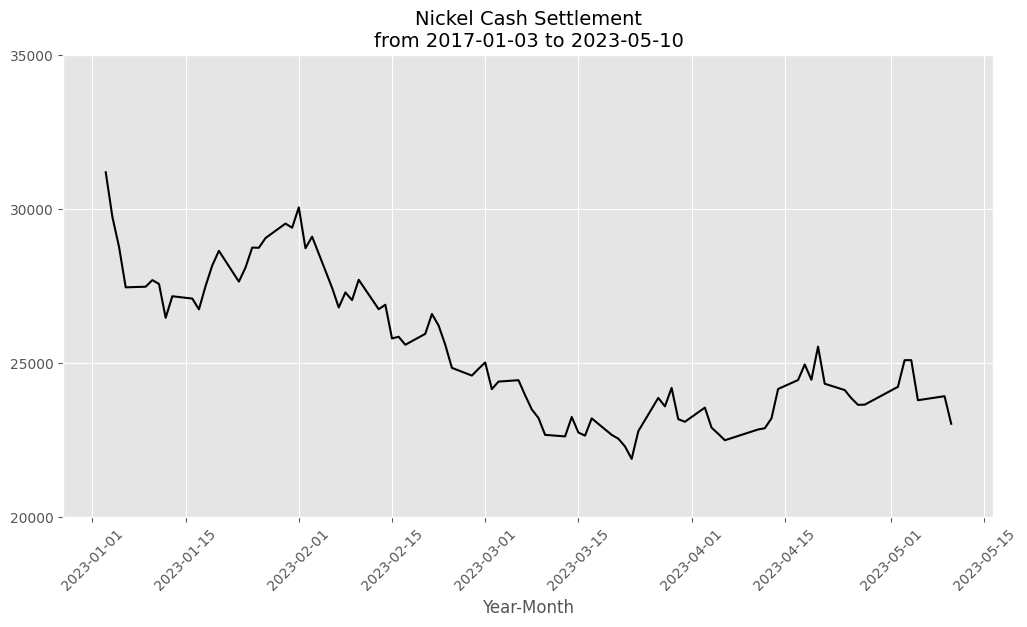

In [ ]:
#@title Step 2-1: 視覺化 {display-mode: "form"}
#@markdown 從 2023 年 1 月至 2023 年 5 月 9 日的每個交易日，鎳現金結算的走勢圖:

# 2023 年起每個交易日的鎳現金結算(截至 5 月 9 日)
date_idx = data.index[data['date'].dt.year>=2023].sort_values(ascending=False)
dates = data.loc[date_idx, 'date']
cash_settlement = data.loc[date_idx, 'LME Nickel Cash-Settlement']

# 資料的起迄日
start_date = str(data['date'].iloc[-1].date()) 
end_date = str(data['date'].iloc[0].date()) 

# 趨勢圖
plt.figure(figsize=(12,6))
plt.plot(dates, cash_settlement, color='black')
plt.yticks(np.arange(20000, 40000, 5000))
plt.tick_params(axis='x', rotation=45)
plt.title('Nickel Cash Settlement\nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year-Month')
plt.show()

## Step 3: 定義函數  
有關 PSI 偵測數據飄移， Python 程式碼執行的步驟如下:

*   **Step 1**:   
分箱離算化樣本數據。基於過往樣本 P 的數據分佈，計算分箱的區間分割點，分別對過往樣本 P 與近期樣本 Q 進行分箱離散化。  
注意 : 分箱的方法(等距分割、等頻分割)與分割的個數，皆會影響離散化後的資料分佈結果。   

*   **Step 2**:  
統計過往樣本 P 與近期樣本 Q 在每個分割區間中的樣本數佔比。

*   **Step 3**:  
計算 PSI，加總每個分割區間的兩樣本佔比差與兩樣本佔比的比例取自然對數的乘積，計算公式如下:    
$$ \text{PSI} = \sum_{i=1}^{M} (R_{P,i}-R_{Q, i})\times \ln(\frac{R_{P,i}}{R_{Q,i}}),$$
其中，$M$ 為離散化的分割區間數，$R_{P,i}$ 與 $R_{Q,i}$ 分別為樣本 P 與樣本 Q 在某個分割區間中的佔比。 
  


💻 定義計算離散化分割點的函數:  

In [ ]:
def create_bin_rule(data, bins_num=4, method='uniform'):
    """
    等距(等頻)分割數據離散化的區間分割點。 

    params:
        data (series): 數據集
        bins_num (int): 數據分箱離散化的區間數，預設為 10 。
        method (str): 數據分箱離散化的方法，有兩種方法: 'uniform' 等距分割、'quantile' 等頻分割，預設為 'uniform'。

    returns:
        bin_rule (list): 等距(或等頻)分割的分割點
    """    

    if not isinstance(data, pd.Series):
        raise TypeError('data 參數的資料型態須為 pd.Series。')

    if method=='uniform':
        min_value = min(data)
        max_value = max(data)
        bin_rule = np.linspace(min_value, max_value, bins_num+1)

    elif method=='quantile':
        bin_rule = pd.qcut(data, q=bins_num, precision=3, retbins=True)[1]
    
    bin_rule = list(bin_rule)
    bin_rule = [round(num, 3) for num in bin_rule]

    return bin_rule

💻 數據離散化後，統計樣本資料在每個分割區間的個數與佔比:  

In [ ]:
def discretization(data, bin_rule): 
    """
    在藉由指定的分割區間離散化數據後，統計在每個區間的個數與佔比。 

    params:
        data (series): 數據集
        bin_rule (list): 指定的分割區間。

    returns:
        label_counts (df): 數據離散化後，每個區間的個數與佔比。
    """       

    if not isinstance(data, pd.Series):
        raise TypeError('data 參數的資料型態須為 pd.Series。')

    temp_df = pd.DataFrame()    
    temp_df['data'] = data
    
    # 數據離散化
    temp_df['labels'] = pd.cut(data, bin_rule, include_lowest=True).astype(str)
    temp_df = temp_df[temp_df['labels']!='nan']
    
    # 計算每個區間的個數
    label_counts = temp_df['labels'].value_counts()
    label_counts = pd.DataFrame(label_counts)

    # 重新命名欄位名稱與索引名稱
    label_counts.columns = ['counts']
    label_counts.index.name = 'labels'
    
    # 計算每個區間的占比
    label_counts['percent'] = label_counts['counts']/sum(label_counts['counts'])

    return label_counts

💻 計算兩樣本的 PSI 值且評量其差異性:   

In [ ]:
def calc_psi(p_data, q_data, bins_num=10, create_bins_method='uniform', eps=1e-5, threshold=0.2):
    """
    計算 PSI(Population Stability Index)，且評估兩樣本 P 與 Q 分佈之間的差異性。

    params:
        p_data (pd.Series): 樣本 P
        q_data (pd.Series): 樣本 Q
        bins_num (int): 樣本數據分箱離散化的區間數，預設為 10 。
        create_bins_method (str): 樣本數據分箱離散化的方法，有 'uniform' 等距分割、'quantile' 等頻分割，預設為 'uniform'。
        eps (float): 在計算 PSI 時，以極小的數取代 0 ，避免產生除以 0 的錯誤值，預設為 1e-5。
        threshold (float): 判別資料分佈差異的 PSI 臨界值，預設為 0.2 。

    returns:
        psi (float): PSI 值
        stability (str): 兩樣本 P 與 Q 分佈之間的差異程度，一般而言，若 PSI 值大於 0.25，表示有資料飄移的現象發生。
        distr_summary (df): 兩樣本 P 與 Q 分箱離散化後，各分箱區間的個數與佔比。
    """

    if not isinstance(p_data, pd.Series):
        raise TypeError('p_data 參數的資料型態須為 pd.Series。')
    
    if not isinstance(q_data, pd.Series):
        raise TypeError('q_data 參數的資料型態須為 pd.Series。')

    # 樣本數據離散化的分割點
    if create_bins_method=='uniform':
        all_data = pd.concat([p_data, q_data])
        bin_rule = create_bin_rule(all_data, bins_num, create_bins_method)

    elif create_bins_method=='quantile':
        bin_rule = create_bin_rule(p_data, bins_num, create_bins_method)

    # 離散化樣本 P 與樣本 Q
    discretize_p_data = discretization(p_data, bin_rule)
    discretize_q_data = discretization(q_data, bin_rule)
    distr_summary = discretize_p_data.join(discretize_q_data, how='outer', lsuffix='_p', rsuffix='_q')

    # 由小到大排序分割的區間
    distr_summary.reset_index(inplace=True)
    distr_summary['left_point_of_bin'] = distr_summary.labels.str.extract('\((.*),', expand=False).astype(float)
    distr_summary.sort_values(by='left_point_of_bin', inplace=True)
    distr_summary.drop(['left_point_of_bin'], axis=1, inplace=True )

    # 計算 PSI
    for col in ['percent_p', 'percent_q']:
        # 以極小的值 eps 取代 0，避免後續計算 PSI 值時，發生除以 0 的情況。
        distr_summary[col] = distr_summary[col].fillna(eps)

    distr_summary['idx'] = distr_summary.apply(lambda x: 
                                               (x['percent_p']-x['percent_q'])*np.log(x['percent_p']/x['percent_q']), 
                                               axis=1)
    psi = np.sum(distr_summary['idx'])
    
    # 評估兩樣本 P 與 Q 分佈之間的差異程度
    if psi<0.1:
        stability='Stable'
    
    elif (psi>=0.1) and (psi<threshold):
        stability = 'Slightly Changed'
    
    elif (psi>=threshold) and (psi<0.5):
        stability = 'Moderately Changed'
    
    else:
        stability = 'Highly Changed'
        
    return psi, stability, distr_summary

透過滑動視窗的方式，對單一變數的時序資料，以 PSI 值偵測資料是否隨著時間，發生數據飄移(Data Drift)的現象:

In [ ]:
def data_drift_detector_in_psi(in_data, detect_col_name, sliding_window_size, shift_date_step=5, 
                               bins_num=10, create_bins_method='uniform', eps=1e-5, threshold=0.2,
                               shift_p_threshold=0):
    '''
    利用滑動視窗的方式，檢測時序資料是否發生數據飄移的現象。

    Args:
        in_data (dataframe): 資料集(具有時間日期的欄位)
        detect_col_name (str): 欲偵測的欄位名稱
        sliding_window_size (int): 滑動視窗的大小
        shift_date_step (int): 滑動視窗位移的步數，預設為 5
        shift_p_threshold (int): 連續檢測出兩樣本機率分佈不同的次數，預設為 0 。
                                 若為 0 ，則滑動視窗 P 固定不動。
        threshold (float): 判別資料分佈差異的 PSI 臨界值，預設為 0.2 。

    Returns:
        output_data (dataframe): 各時間點下的檢測結果。
    '''

    if not isinstance(in_data, pd.DataFrame):
        raise TypeError('in_data 參數的資料型態須為 pd.DataFrame。')

    date_idx = in_data.index
    
    # 建立空的 dataframe 用以儲存偵測結果
    output_data = pd.DataFrame(columns=['p_data', 'p_idx', 'p_date', 'q_data', 'q_idx', 'q_date', 
                                        'psi', 'threshold', 'stability', 'distr_summary', 'shift_p_data'])

    for iter_idx, i in enumerate(range(0, len(date_idx)-sliding_window_size+1, shift_date_step)):

        if iter_idx==0:               
            if not shift_p_threshold is np.nan:
                shift_p_data = False
                different_count = 0

            # 篩選資料 P
            p_idx = date_idx[i:i+sliding_window_size]
            p_data = in_data.loc[p_idx, detect_col_name] # Series Type        

        else:  
            # 篩選資料 Q
            q_idx = date_idx[i:i+sliding_window_size]
            q_data = in_data.loc[q_idx, detect_col_name] # Series Type

            # 兩樣本 P 與 Q 的 PSI 值、差異程度評估與離散化後的分布
            psi, stability, distr_summary = calc_psi(p_data, q_data, bins_num, create_bins_method, eps)
            
            # 儲存 PSI 值與相關資訊
            output_data.loc[len(output_data.index)] = [p_data, p_idx, data.loc[p_idx, 'date'],
                                                       q_data, q_idx, data.loc[q_idx, 'date'],
                                                       psi, threshold, stability, distr_summary, shift_p_data]

            if not shift_p_threshold is np.nan:                

                if shift_p_data:
                    shift_p_data = False
                    different_count = 0
                
                if not (psi<threshold):
                    different_count += 1

                    if different_count==shift_p_threshold:
                        shift_p_data = True    
                        p_idx = q_idx
                        p_data = q_data


                else: 
                    different_count += 0

    output_data.index = output_data.index+1

    return output_data

💻 定義函數用以繪製每個時間點偵測結果的視覺化:

In [ ]:
def plot_output_image(detection_data, detect_col_name, detection_result, folder_name='output_imgs'):
    '''
    視覺化各時間點 PSI 值與相關評估結果。

    Args:
        detection_data (dataframe): 待偵測的原始資料集(具有時間日期的欄位)
        detect_col_name (str): 欲偵測的欄位名稱
        detection_result (dataframe): 各時間點下的偵測結果
        folder_name (str): 儲存圖片的資料夾名稱

    Returns:
        對各時間點的偵測結果，將其視覺化且儲成圖片。
    '''    
    
    # 建立儲存圖片的資料夾
    img_folder = os.path.join(os.getcwd(), folder_name)
    if not os.path.exists(img_folder):
        os.makedirs(img_folder)

    img_paths = []
    for i in list(detection_result.index):  
        
        current_distr_summary = detection_output.loc[i, 'distr_summary']
        current_psi = detection_output.loc[i, 'psi']
        psi_threshold = detection_output.loc[i, 'threshold']
        current_stability = detection_output.loc[i, 'stability']
        
        p_data = detection_result.loc[i, 'p_data']
        q_data = detection_result.loc[i, 'q_data'] 
        p_date = detection_result.loc[i, 'p_date']
        q_date = detection_result.loc[i, 'q_date']
        p_start_date = str(list(p_date)[0].date())
        p_end_date = str(list(p_date)[-1].date())
        q_start_date = str(list(q_date)[0].date())
        q_end_date = str(list(q_date)[-1].date())
        idx_of_sliding_win = range(1, len(p_data)+1)

        fig = plt.figure(figsize=(15, 10), constrained_layout=True)
        gs = gridspec.GridSpec(3, 2, figure=fig)
        
        # 子圖 1: 兩滑動視窗的資料 
        ax1 = fig.add_subplot(gs[0, 0])
        y_upper_bound = round(detection_data[detect_col_name].max(), -3)

        ax1.plot(detection_data['date'], detection_data[detect_col_name], color='gray', alpha=0.5)
        ax1.fill_between(p_date, p_data, alpha=0.6, label='P: from '+p_start_date+' to '+p_end_date)
        ax1.fill_between(q_date, q_data, alpha=0.6, label='Q: from '+q_start_date+' to '+q_end_date)
        ax1.legend(loc=2)
        ax1.set_ylim([0, y_upper_bound*1.3])
        ax1.tick_params(axis='x', rotation=45)
        ax1.set_title('Nickel Cash Settlement')
        ax1.set_xlabel('Date')

        # 子圖 2: 累積分佈函數、 KS 檢定統計量與 P Value
        ax2 = fig.add_subplot(gs[0, 1])
        x_axis = np.arange(len(current_distr_summary['labels']))

        ax2.bar(x_axis-0.2, list(current_distr_summary['counts_p']), 0.4, alpha=0.6, label='P')
        ax2.bar(x_axis+0.2, list(current_distr_summary['counts_q']), 0.4, alpha=0.6, label='Q')
        ax2.legend(loc=2)
        ax2.set_xticks(x_axis, current_distr_summary['labels'], rotation=45)
        ax2.set_title('Bar Chart')
        ax2.set_xlabel('Nickel Cash Settlement')

        # # 子圖 3: KS 檢定統計量與是否拒絕虛無假設
        ax3 = fig.add_subplot(gs[1, :])
        y_upper_bound = round(detection_result.loc[0:i, 'psi'].max(), 3)
        
        ax3.axhline(y=psi_threshold, color='green', linestyle='-', alpha=0.7)
        ax3.plot(detection_result.loc[0:i, 'psi'], marker='o' ,markersize=5, color='gray', alpha=0.6)

        if (current_psi<0.25):
            ax3.plot(i, detection_result.loc[i, 'psi'], marker='o', markersize=8, color='green', 
                     label='PSI= '+str(round(current_psi, 3))+'\n'+'Current Stability: '+ current_stability)
 
        else:
            ax3.plot(i, detection_result.loc[i, 'psi'], marker='o', markersize=8, color='red', 
                     label='PSI= '+str(round(current_psi, 3))+'\n'+'Current Stability: '+ current_stability)  
                
        ax3.legend(loc=2, fontsize=12)

        if i<=50: 
            ax3.set_xticks(list(range(1, i+1)))
        
        else:
            ax3.set_xticks(list(range(1, i+1, 5)))

        ax3.set_xlabel('Iteration of Detection')
        ax3.set_ylabel('PSI', color='green')
        ax3.set_ylim([0, y_upper_bound*1.05])
        plt.title('Population Stability Index', fontsize=16)
        
        # 儲存圖片
        img_path = os.path.join(img_folder, str(i)+'.png') 
        plt.savefig(img_path, bbox_inches='tight', format='png')
        img_paths.append(img_path)
        plt.show()

    return img_paths

In [ ]:
def create_gif(img_paths, gif_name, gif_duration=100, gif_loop=3):
    '''
    製作 gif 檔。

    Args:
        img_paths (list): 每張圖片的路徑(包含檔名)
        gif_name (str): gif 檔的檔名(.gif)
        gif_duration (int): 每一禎的持續時間
        gif_loop (int): 動畫的重複次數
    '''    

    # 繪製 gif 檔
    Frames = []
    for img in img_paths: 
        frame = Image.open(img)
        Frames.append(frame)

    gif_path = os.path.join(os.getcwd(), gif_name)
    Frames[0].save(gif_path, save_all=True, append_images=Frames[1:], 
                   duration=gif_duration, loop=gif_loop)

## Step 4: 偵測數據飄移

#### 方法一 : 固定滑動視窗 P

<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Data_Drift_Detection_in_PSI_with_fixed_1_sliding_window.gif">
</p>

In [ ]:
# 篩選 2023 年後的資料
detection_data = data[data['date'].dt.year>=2023]

# 將日期由遠到近重新排序
detection_data = detection_data.sort_values(by='date') 

###### 參數設定 ######
## 滑動視窗的大小
sliding_window_size = 30

## 滑動視窗位移的步數
shift_date_step = 1

## 樣本數據離散化的分箱方法
create_bins_method='uniform'

## 樣本數據離散化的分箱區間個數
bins_num = 10

## 計算 PSI 時，以極小的數取代 0 ，避免產生除以 0 的錯誤值。
eps=1e-5

## 判別資料分佈差異的 PSI 臨界值
threshold = 0.25

## 連續檢測出兩樣本機率分佈不同的次數，
## 當達到此次數時，將移動滑動視窗 P，若設為 0，則表示固定滑動視窗 P。 
shift_p_threshold = 0

#####################

# 滑動視窗檢測
detection_output = data_drift_detector_in_psi(detection_data, 'LME Nickel Cash-Settlement', 
                                              sliding_window_size, shift_date_step, 
                                              bins_num, create_bins_method, eps, threshold,
                                              shift_p_threshold)

detection_output

In [ ]:
# 繪製每次偵測的結果
img_paths = plot_output_image(detection_data, 'LME Nickel Cash-Settlement', 
                              detection_output, folder_name='output_imgs_of_fixed_1_sliding_window')

In [ ]:
# 製作 gif 檔
create_gif(img_paths, gif_name='Data_Drift_Detection_in_PSI_with_fixed_1_sliding_window.gif', 
           gif_duration=600, gif_loop=3)

#### 方法二 : 不固定滑動視窗 P

<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/Population_Stability_Index/Imgs/Data_Drift_Detection_in_PSI_with_unfixed_2_sliding_windows.gif">
</p>


In [ ]:
# 篩選 2023 年後的資料
detection_data = data[data['date'].dt.year>=2023]

# 將日期由遠到近重新排序
detection_data = detection_data.sort_values(by='date') 

###### 參數設定 ######
## 滑動視窗的大小
sliding_window_size = 30

## 滑動視窗位移的步數
shift_date_step = 1

## 樣本數據離散化的分箱方法
create_bins_method='uniform'

## 樣本數據離散化的分箱區間個數
bins_num = 10

## 計算 PSI 時，以極小的數取代 0 ，避免產生除以 0 的錯誤值。
eps=1e-5

## 判別資料分佈差異的 PSI 臨界值
threshold = 0.25

## 連續檢測出兩樣本機率分佈不同的次數，
## 當達到此次數時，將移動滑動視窗 P，若設為 0，則表示固定滑動視窗 P。 
shift_p_threshold = 5

#####################

# 滑動視窗檢測
detection_output = data_drift_detector_in_psi(detection_data, 'LME Nickel Cash-Settlement', 
                                              sliding_window_size, shift_date_step, 
                                              bins_num, create_bins_method, eps, threshold,
                                              shift_p_threshold)

detection_output

In [ ]:
# 繪製每次偵測的結果
img_paths = plot_output_image(detection_data, 'LME Nickel Cash-Settlement', 
                              detection_output, folder_name='output_imgs_of_unfixed_2_sliding_windows')

In [ ]:
# 製作 gif 檔
create_gif(img_paths, gif_name='Data_Drift_Detection_in_PSI_with_unfixed_2_sliding_windows.gif', 
           gif_duration=600, gif_loop=3)

# **參考資料**  

### **文章**  
##### 註: 順序為作者的閱讀順序   
* Vinícius Trevisan (2022), *Is your ML model stable? Checking model stability and population drift with PSI and CSI*,   
from [https://towardsdatascience.com/checking-model-stability-and-population-shift-with-psi-and-csi-6d12af008783](https://towardsdatascience.com/checking-model-stability-and-population-shift-with-psi-and-csi-6d12af008783).  
* Matthew Burke (2018), *Population Stability Index*,  
from [https://mwburke.github.io/data%20science/2018/04/29/population-stability-index.html](https://mwburke.github.io/data%20science/2018/04/29/population-stability-index.html).  
* Aditya Agarwal (2020), *Population Stability Index (PSI)*,  
from [https://medium.com/model-monitoring-psi/population-stability-index-psi-ab133b0a5d42](https://medium.com/model-monitoring-psi/population-stability-index-psi-ab133b0a5d42).      

### **論文**  
* Bilal Yurdakul, *Statistical Properties of Population Stability Index*, 2018.  
[https://scholarworks.wmich.edu/dissertations/3208/](https://scholarworks.wmich.edu/dissertations/3208/).


# 返回【[如何偵測模型飄移](https://github.com/YenLinWu/Model_Drift/blob/main/README.md#%E5%A6%82%E4%BD%95%E5%81%B5%E6%B8%AC%E6%A8%A1%E5%9E%8B%E9%A3%84%E7%A7%BB-how-to-detect-model-drift)】

